## test para obtener weather data

In [2]:
%matplotlib inline
import sys
from pathlib import Path
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pandas as pd

data_dir = Path.cwd().parent / "data"
import pcse
print("This notebook was built with:")
print(f"python version: {sys.version}")
print(f"PCSE version: {pcse.__version__}")

print(data_dir)

from pcse.fileinput import ExcelWeatherDataProvider

weatherfile = data_dir / "elroble_2000to2024.xlsx"
weatherdataprovider = ExcelWeatherDataProvider(weatherfile)
print(weatherdataprovider)

This notebook was built with:
python version: 3.10.15 | packaged by conda-forge | (main, Oct 16 2024, 01:15:49) [MSC v.1941 64 bit (AMD64)]
PCSE version: 6.0.8
c:\Users\javie\OneDrive\SCRIPTS\Python_Scripts\clisco\Cropmodels\data
Failed reading row: 7183. Skipping...
Failed reading row: 7184. Skipping...
Failed reading row: 7185. Skipping...
Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: Uruguay
Station: NASAPOWER
Description: from nasapower
Source: Daymet and Nasa power
Contact: Javier Moreira
----Site characteristics----
Elevation:  125.0
Latitude:  -33.492
Longitude: -57.079
Data available for 2004-11-24 - 2024-11-10
Number of missing days: 3



In [3]:
from pcse.input import NASAPowerWeatherDataProvider

weatherdata = NASAPowerWeatherDataProvider(longitude=-58.10, latitude=-33.705)
print(weatherdata)

Weather data provided by: NASAPowerWeatherDataProvider
--------Description---------
NASA/POWER Source Native Resolution Daily Data
----Site characteristics----
Elevation:   34.9
Latitude:  -33.705
Longitude: -58.100
Data available for 1984-01-01 - 2025-01-14
Number of missing days: 0



In [4]:
df = pd.DataFrame(weatherdata.export()).set_index("DAY")
#df.info()
df.tail()

,LAT,LON,ELEV,IRRAD,TMIN,TMAX,VAP,RAIN,E0,ES0,ET0,WIND,TEMP
DAY,,,,,,,,,,,,,
2025-01-10,-33.705,-58.1,34.88,31380000.0,19.05,33.09,16.501522,0.0,0.905371,0.809395,0.769736,2.51,25.88
2025-01-11,-33.705,-58.1,34.88,31280000.0,18.93,32.57,17.097428,0.0,0.908275,0.813003,0.771669,2.86,25.62
2025-01-12,-33.705,-58.1,34.88,31210000.0,18.87,32.99,16.310495,0.0,0.878443,0.783160,0.746008,2.24,25.78
2025-01-13,-33.705,-58.1,34.88,30950000.0,19.70,33.27,15.923911,0.0,0.890862,0.795697,0.773958,2.45,26.33
2025-01-14,-33.705,-58.1,34.88,31220000.0,19.36,33.91,16.278846,0.0,0.921772,0.825595,0.782407,2.44,26.68


C:\Users\javie\AppData\Local\Temp\ipykernel_26208\395787571.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_year'] = df_filtered.index.dayofyear


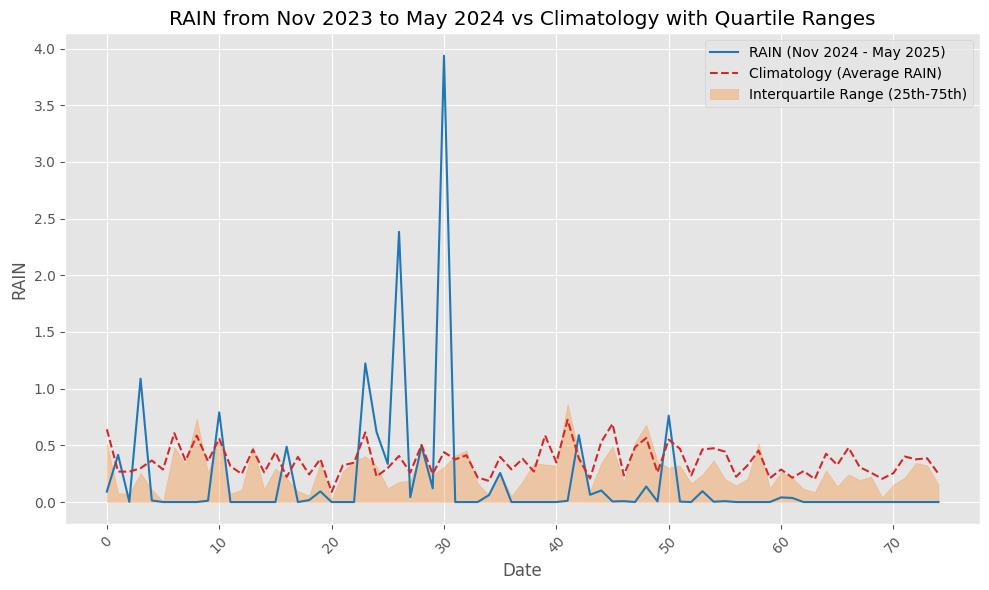

In [6]:
#get 2023/2024 irrad 
## nov-may
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded

# Choose the variable to plot (change 'VAP' to any other column like 'TMIN', 'TMAX', etc.)
variable = 'RAIN'  # Change this to any column name, e.g., 'TMIN', 'TMAX', etc.

# Step 1: Ensure that the index is in datetime format
df.index = pd.to_datetime(df.index)

# Step 2: Filter the DataFrame for the desired date range: Nov 2023 to May 2024
df_filtered = df.loc['2024-11-01':'2025-05-31']

# Step 3: Calculate the climatology (mean for each day of the year, across all years)
df['day_of_year'] = df.index.dayofyear  # Add a column for the day of the year
climatology = df.groupby('day_of_year')[variable].mean()  # Average for each day of the year

# Step 4: Calculate the 25th and 75th percentiles for each day of the year
q25 = df.groupby('day_of_year')[variable].quantile(0.25)  # 25th percentile
q75 = df.groupby('day_of_year')[variable].quantile(0.75)  # 75th percentile

# Step 5: Get the day-of-year for the filtered data
df_filtered['day_of_year'] = df_filtered.index.dayofyear

# Step 6: Merge the climatology with the filtered data by day of year (with a suffix)
df_filtered = df_filtered.merge(climatology, on='day_of_year', suffixes=('', '_clim'))

# Step 7: Merge the 25th percentile with the filtered data by day of year (with a suffix)
df_filtered = df_filtered.merge(q25, on='day_of_year', suffixes=('', '_q25'))

# Step 8: Merge the 75th percentile with the filtered data by day of year (with a suffix)
df_filtered = df_filtered.merge(q75, on='day_of_year', suffixes=('', '_q75'))

# Step 9: Plot the selected variable, climatology, and quartile ranges
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered[variable], label=f'{variable} (Nov 2024 - May 2025)', color='tab:blue')
plt.plot(df_filtered.index, df_filtered[f'{variable}_clim'], label=f'Climatology (Average {variable})', color='tab:red', linestyle='--')

# Step 10: Add shaded area for the interquartile range (25th to 75th percentiles)
plt.fill_between(df_filtered.index, df_filtered[f'{variable}_q25'], df_filtered[f'{variable}_q75'], color='tab:orange', alpha=0.3, label=f'Interquartile Range (25th-75th)')

# Step 11: Add title and labels
plt.title(f'{variable} from Nov 2023 to May 2024 vs Climatology with Quartile Ranges')
plt.xlabel('Date')
plt.ylabel(f'{variable}')

# Step 12: Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Step 13: Add a legend
plt.legend()

# Step 14: Display the plot
plt.tight_layout()
plt.show()

